In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diseases-and-symptoms-dataset/Final_Augmented_dataset_Diseases_and_Symptoms.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/diseases-and-symptoms-dataset/Final_Augmented_dataset_Diseases_and_Symptoms.csv")

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns


Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)

In [5]:
X = df.drop("diseases", axis=1)   # all symptom columns
y = df["diseases"]                # target column

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Unique diseases:", y.nunique())

Features shape: (246945, 377)
Target shape: (246945,)
Unique diseases: 773


In [6]:
#  Remove diseases with only 1 sample
counts = y.value_counts()
valid_classes = counts[counts > 1].index
df_filtered = df[df["diseases"].isin(valid_classes)]

# Redefine X and y
X = df_filtered.drop("diseases", axis=1)
y = df_filtered["diseases"]

print("Dataset shape after filtering:", df_filtered.shape)
print("Remaining unique diseases:", y.nunique())

# Now split again with stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Dataset shape after filtering: (246926, 378)
Remaining unique diseases: 754
Training samples: 197540
Testing samples: 49386


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 197540
Testing samples: 49386


In [9]:
#  Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

In [10]:
#  Predictions
y_pred = nb.predict(X_test)

In [11]:
#  Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nNaïve Bayes Accuracy:", round(accuracy, 4))


Naïve Bayes Accuracy: 0.8387


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       1.00      1.00      1.00        20
                                        abdominal hernia       0.95      0.93      0.94        81
                                         abscess of nose       1.00      0.67      0.80        64
                                     abscess of the lung       0.00      0.00      0.00         5
                                  abscess of the pharynx       0.84      0.77      0.80        64
                                    acanthosis nigricans       1.00      0.11      0.20         9
                                               acariasis       1.00      0.75      0.86         8
                                               achalasia       1.00      0.60      0.75        20
                                                    acne       0.99      0.73      0.84       105
                   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


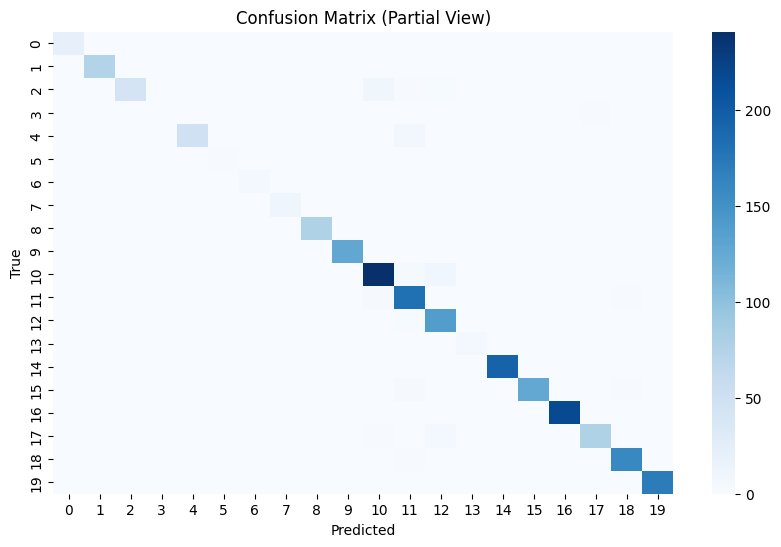

In [13]:
#  Confusion Matrix (just for visualization of a few classes)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm[:20,:20], annot=False, cmap="Blues", cbar=True)  
plt.title("Confusion Matrix (Partial View)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

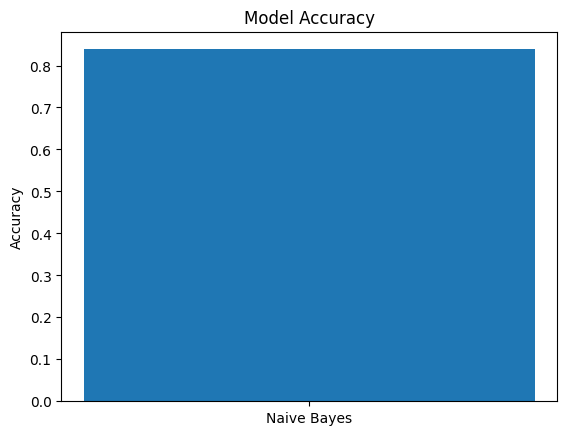

In [14]:
# Accuracy bar
plt.bar(["Naive Bayes"], [accuracy_score(y_test, y_pred)])
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


In [15]:
# import ipywidgets as widgets
# from IPython.display import display

# # Create text input box
# symptom_box = widgets.Text(
#     value="fever, cough",
#     placeholder="Enter symptoms here...",
#     description="Symptoms:",
#     disabled=False
# )

# output = widgets.Output()

# def on_submit(change):
#     with output:
#         output.clear_output()
#         result = predict_disease(change["new"])
#         print("Predicted Disease:", result)

# symptom_box.observe(on_submit, names="value")
# display(symptom_box, output)
